<a href="https://colab.research.google.com/github/micprov/19F-MRI/blob/main/mri_analisi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt



In [ ]:
model_folder = "/content/drive/MyDrive/Denoiser/saved_models/K_gap" 
model = tf.keras.models.load_model(model_folder)

In [ ]:
theta=np.linspace(0,2*np.pi,128)
dummy_sine = np.zeros([1,128,128,1])
for i in range(dummy_sine.shape[1]):
  for j in range(dummy_sine.shape[1]):
    
    dummy_sine[0,i,j,0] = np.sin(theta[i])*np.cos(theta[j])  


dummy_data = 0.5*255*(1*dummy_sine + 0.1*np.random.randn(30,128,128,2))#crea dei dati della forma richiesta  [batch (z),x,y,canali] dove canali è parte reale e immaginaria
dummy_out = model(dummy_data)

(array([3.90600e+03, 7.75310e+04, 3.37750e+05, 1.76907e+05, 1.98612e+05,
        1.87143e+05, 1.09500e+03, 3.60000e+01, 3.00000e+01, 3.00000e+01]),
 array([-83.02866 , -57.446777, -31.864893,  -6.283007,  19.298878,
         44.880764,  70.46265 ,  96.04453 , 121.62642 , 147.20831 ,
        172.79019 ], dtype=float32),
 <a list of 10 Patch objects>)

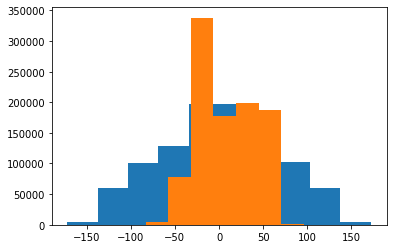

In [ ]:
plt.hist(dummy_data.ravel())
plt.hist(dummy_out.numpy().ravel())

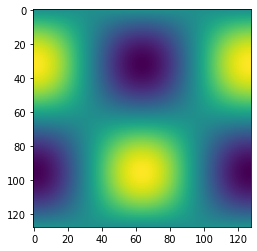

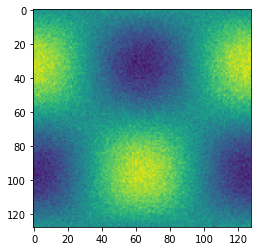

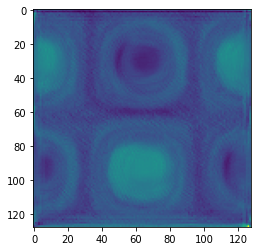

In [ ]:
plt.figure()
plt.imshow(dummy_sine[0,:,:,0])
plt.figure()
plt.imshow(dummy_data[0,:,:,0])
plt.figure()
plt.imshow(dummy_out[0,:,:,0])

In [ ]:
# è il codice tensorflow per fare la trasformata i fourier e portare da K a magnitude image
Mag_denoised=tf.abs(tf.signal.fftshift(tf.signal.ifft2d(tf.signal.fftshift(tf.complex(dummy_out[:,:,:,0], dummy_out[:,:,:,1])))))
Mag_noise=tf.abs(tf.signal.fftshift(tf.signal.ifft2d(tf.signal.fftshift(tf.complex(dummy_data[:,:,:,0], dummy_data[:,:,:,1])))))


In [ ]:
def normM(M0):
    '''float norm tra 0.1'''
    
#    M0 = M0.numpy()
    M0 = (M0-np.min(M0))/(np.max(M0)-np.min(M0))
    return M0

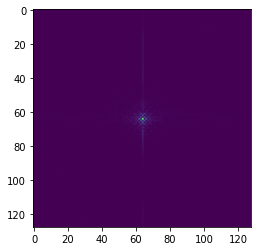

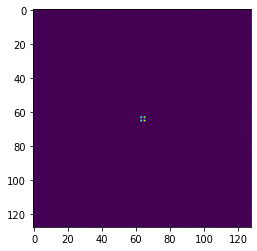

In [ ]:

plt.figure()
plt.imshow(normM(Mag_denoised[0,:,:]))
plt.figure()
plt.imshow(normM(Mag_noise[0,:,:]))

In [ ]:
from scipy.io import loadmat        
#Immagine = "/content/drive/MyDrive/Denoiser/raw_sample.mat"
Immagine = "/content/drive/MyDrive/Denoiser/Rowdata/21-03-2022/MeanRaw.mat"

imm = loadmat(Immagine)['ans']# output di scipy.io is a dictionary "ans" select the numerical data
#imm = loadmat(Immagine)# output di scipy.io is a dictionary "ans" select the numerical data
imm=np.transpose(imm,(-1,0,1))


KeyError: ignored

In [ ]:
imm_2ch = np.zeros([12,64,64,2])
imm_2ch[:,:,:,0] = np.real(imm)
imm_2ch[:,:,:,1] = np.imag(imm)

Mag_raw=tf.abs(tf.signal.fftshift(tf.signal.ifft2d(tf.signal.fftshift(tf.complex(imm_2ch[:,:,:,0], imm_2ch[:,:,:,1])))))
Mag_raw=normM(Mag_raw)

In [ ]:
!pip install dipy

     |████████████████████████████████| 7.8 MB 6.1 MB/s 


In [ ]:
from time import time
from dipy.denoise.nlmeans import nlmeans
from dipy.denoise.noise_estimate import estimate_sigma

In [ ]:
data = Mag_raw.numpy()

In [ ]:
sigma = estimate_sigma(data, N=1)# questo metodo ha bisogno di una stima di sigma del noise per funzionare
den = nlmeans(data, sigma=sigma, patch_radius=3,
              block_radius=4, rician=True)

fetta 0
fetta 1
fetta 2
fetta 3
fetta 4
fetta 5
fetta 6
fetta 7
fetta 8
fetta 9
fetta 10
fetta 11


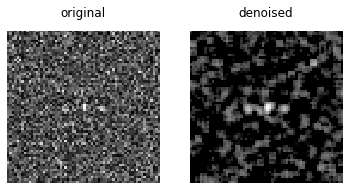

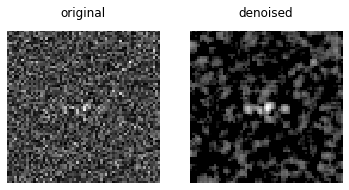

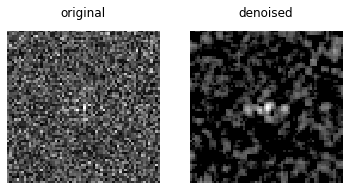

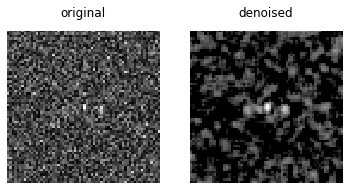

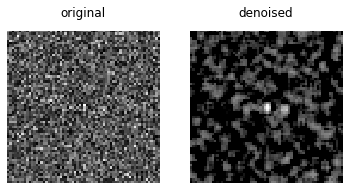

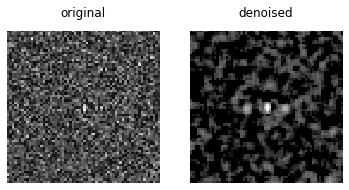

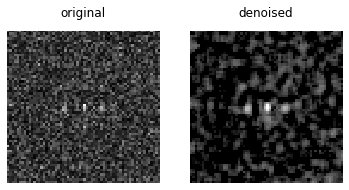

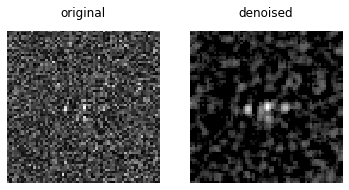

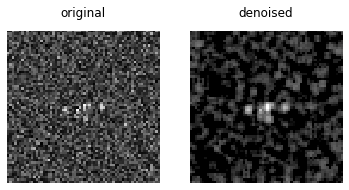

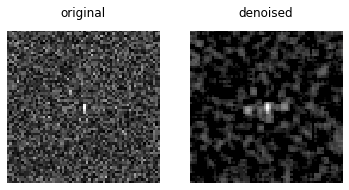

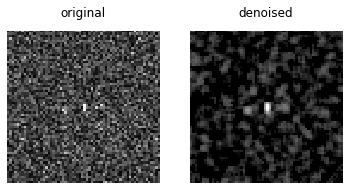

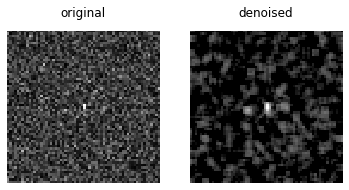

In [ ]:

for i in range(Mag_raw.shape[0]):
  fig, axs = plt.subplots(1,2)
  print("fetta",i)
  axs[1].matshow(den[i,:,:],cmap="Greys_r" )
  axs[1].axis('off')
  axs[1].set_title("denoised")

 
  axs[0].matshow(Mag_raw[i,:,:],cmap="Greys_r" )
  axs[0].axis('off')
  axs[0].set_title("original")
  # 8 best

In [ ]:
Mag_raw=Mag_raw.numpy()

fetta 0
fetta 1
fetta 2
fetta 3
fetta 4
fetta 5
fetta 6
fetta 7
fetta 8
fetta 9
fetta 10
fetta 11


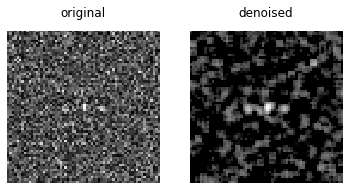

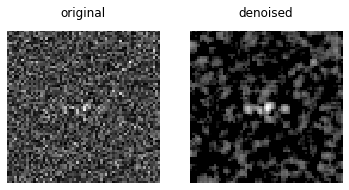

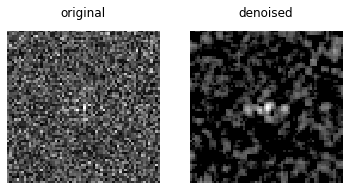

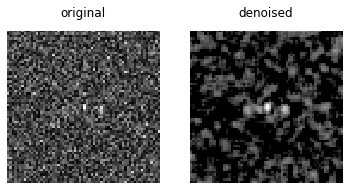

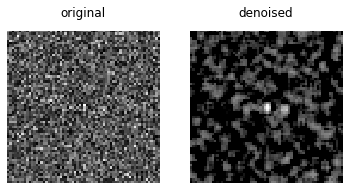

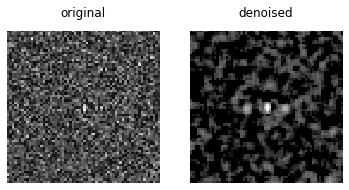

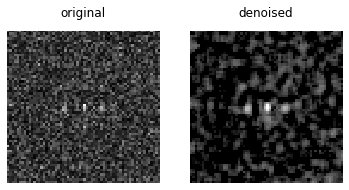

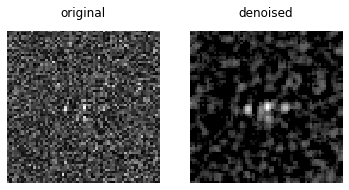

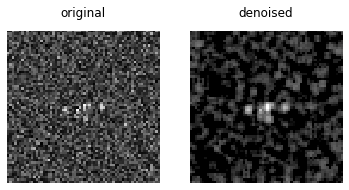

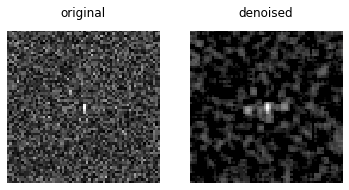

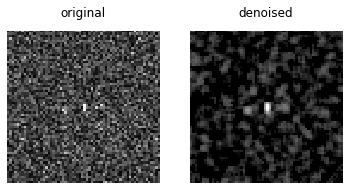

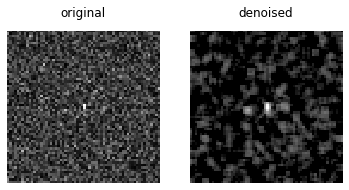

In [ ]:
for i in range(Mag_raw.shape[0]):
  fig, axs = plt.subplots(1,2)
  print("fetta",i)
  axs[1].matshow(den[i,:,:],cmap="Greys_r" )
  axs[1].axis('off')
  axs[1].set_title("denoised")

 
  axs[0].matshow(Mag_raw[i,:,:],cmap="Greys_r" )
  axs[0].axis('off')
  axs[0].set_title("original")
  # 8 best

In [ ]:
print(Mag_raw[8,:,32].max())

0.7843213837656133


0.44288134285451025


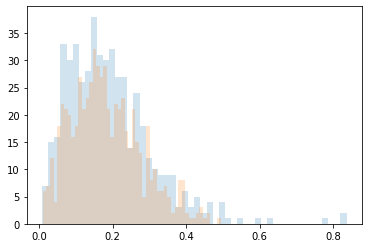

In [ ]:
plt.hist(Mag_raw[7:9,:,29:33].ravel(),50,alpha=0.2)
plt.hist(Mag_raw[7:9,:,0:5].ravel(),50,alpha=0.2)
print(Mag_raw[7,:,33].max())

[[0.32464063 0.33506629 0.13624344 0.14872369]
 [0.06383804 0.06888773 0.02549744 0.07815992]
 [0.21712509 0.27752437 0.22426723 0.0498838 ]
 [0.09398825 0.13951136 0.28065514 0.24343836]
 [0.35968599 0.08841798 0.26831682 0.14705218]
 [0.35312204 0.16210771 0.18363532 0.10668502]
 [0.14293803 0.2258722  0.13390294 0.03067303]
 [0.12690867 0.18679008 0.27059523 0.35315182]
 [0.37204883 0.10207989 0.18005373 0.29054457]
 [0.19668594 0.23804609 0.06271725 0.22951211]
 [0.19118489 0.11999153 0.18873652 0.09817179]
 [0.28730502 0.18946987 0.22292347 0.30969274]
 [0.0822525  0.1431857  0.10848175 0.09593384]
 [0.09208691 0.46975734 0.18249112 0.10146606]
 [0.08591306 0.01777421 0.17931459 0.04464561]
 [0.10931816 0.03635515 0.26071369 0.31794933]
 [0.16835686 0.05220765 0.06993118 0.05956162]
 [0.261461   0.29208581 0.25954006 0.21186035]
 [0.09805265 0.16841013 0.32893744 0.17308434]
 [0.22290847 0.18420635 0.03787597 0.03008559]
 [0.22977169 0.04925602 0.2740065  0.3481891 ]
 [0.22307442 

Text(0.5, 1.0, 'original')

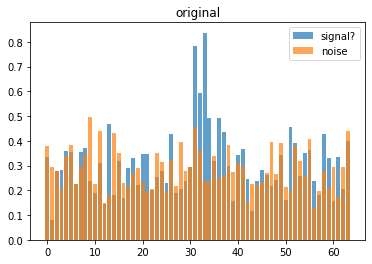

In [ ]:
fetta=8
print(Mag_raw[fetta,:,29:33])
plt.bar(np.arange(64),Mag_raw[fetta,:,29:33].max(axis=-1),alpha=0.7,label="signal?")
plt.bar(np.arange(64),Mag_raw[fetta,:,0:4].max(axis=-1),alpha=0.7,label="noise")
plt.legend()
plt.title("original")

Text(0.5, 1.0, 'denoised')

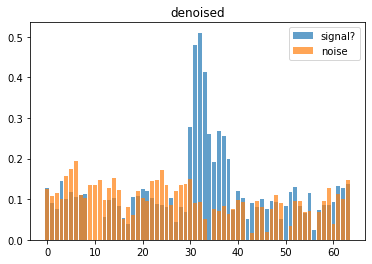

In [ ]:
fetta=8
plt.bar(np.arange(64),den[fetta,:,29:33].max(axis=-1),alpha=0.7,label="signal?")
plt.bar(np.arange(64),den[fetta,:,0:4].max(axis=-1),alpha=0.7,label="noise")
plt.legend()
plt.title("denoised")

In [ ]:
_=plt.hist(Mag_raw.numpy().ravel(),200)

In [ ]:
imm_2ch[1,:,:0].shape

In [ ]:
plt.matshow(imm_2ch[5,:,:,0]) # va portata a 8 bit prima di essere caricata normalizza tra 0,1 e poi si moltiplica per 255

In [ ]:
k_sample =  (imm_2ch/np.max(np.abs(imm_2ch)))*255

In [ ]:
plt.hist(k_sample.ravel())

In [ ]:
paddings = tf.constant([[0,0],[32,32],[32,32],[0,0]])
# 'constant_values' is 0.
# rank of 't' is 2.
k_sample_norm=tf.pad(k_sample, paddings, "CONSTANT")  # [[0, 0, 0, 0, 0, 0, 0],
                                 #  [0, 0, 1, 2, 3, 0, 0],
                                 #  [0, 0, 4, 5, 6, 0, 0],
                                 #  [0, 0, 0, 0, 0, 0, 0]]

out_test= model(k_sample_norm)
out_imm = tf.abs(tf.signal.fftshift(tf.signal.ifft2d(tf.signal.fftshift(tf.complex(out_test[:,:,:,0], out_test[:,:,:,1]))))).numpy()
out_imm[:,60:69,60:69] = np.median(out_imm)
out_imm = normM(out_imm)




In [ ]:
plt.figure(figsize=[6,6]  )
for i in range(out_imm.shape[0]):
  plt.matshow(out_imm[i,:,:],cmap="Greys_r" ,vmax=0.1)